In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier, export_text


In [7]:
mcdonalds = pd.read_csv(r"Downloads/mcdonalds.csv")


In [8]:
mcdonalds.replace('Yes', 1, inplace=True)
mcdonalds.replace('No', 0, inplace=True)
mcdonalds.replace('Male', 0, inplace=True)
mcdonalds.replace('Female', 1, inplace=True)


In [9]:
# PCA
pca = PCA(n_components=11)
MD_x = mcdonalds.iloc[:, 0:11]
MD_x_pca = pca.fit_transform(MD_x)

In [10]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
k4 = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
g4 = gmm.predict(MD_x)

In [13]:
# Hierarchical clustering
MD_x_dist = pdist(MD_x.T, metric='euclidean')
MD_x_linkage = linkage(MD_x_dist, method='complete')


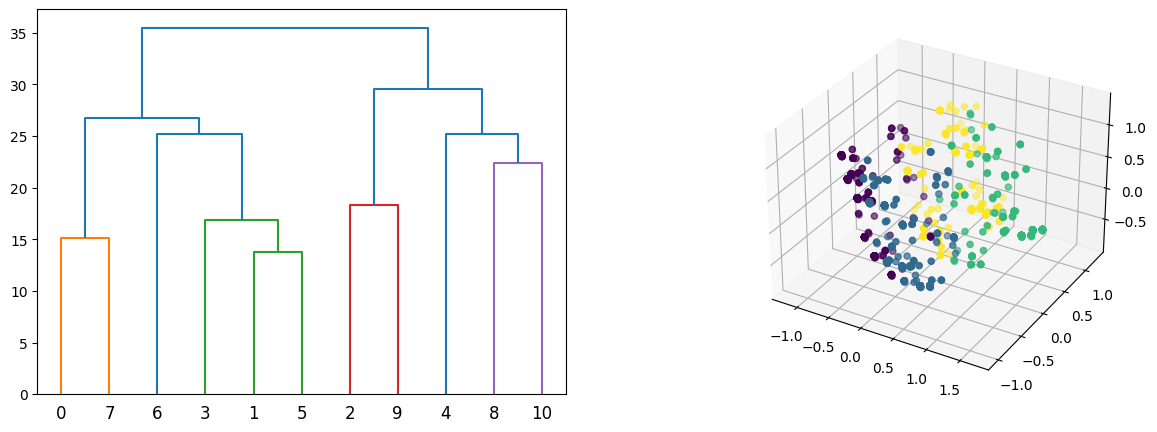

In [14]:
# Visualization
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
dendrogram(MD_x_linkage, ax=ax1)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], MD_x_pca[:, 2], c=k4, cmap='viridis')
plt.show()


In [35]:
import re

# Extract numeric values from the 'Like' column
mcdonalds['Like'] = mcdonalds['Like'].apply(lambda x: re.findall(r'[-+]?\d*\.\d+|\d+', str(x)))
mcdonalds['Like'] = mcdonalds['Like'].apply(lambda x: [int(val) for val in x])

# Calculate the average like score by cluster
like_avg = mcdonalds.groupby(k4)['Like'].apply(lambda x: np.mean([val for sublist in x for val in sublist]))

# Print average like score by cluster
print("\nAverage Like Score by Cluster:")
print(like_avg)



Average Like Score by Cluster:
0    3.072125
1    2.245902
2    3.082645
3    2.599398
Name: Like, dtype: float64


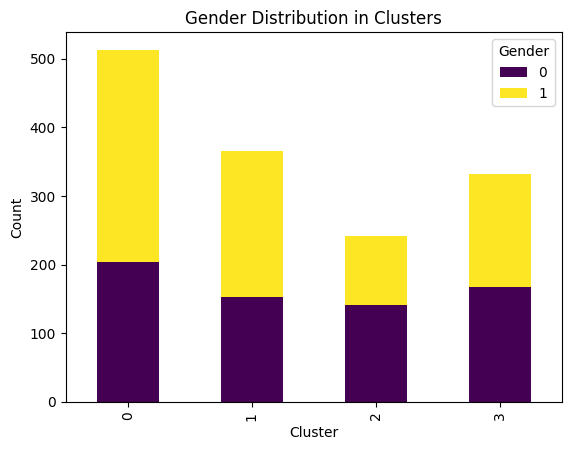

In [53]:
gender_df = pd.crosstab(k4, mcdonalds['Gender'])
gender_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender Distribution in Clusters')
plt.show()